In [2]:
import pandas as pd

In [3]:
shell = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [4]:
shell

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
shell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


No null values found.

In [7]:
shell['Age'] = shell['Rings']+1.5

In [10]:
shell1 = shell.drop(['Rings'], axis=1)

In [11]:
shell1.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


column 'Sex' is not includes since it is an object data

No extreme maximum values are present.

Data looks almost neat. need to check further if any outliers or skewness is present.


Histogram plots will tell us the skewness of data if present. 

We can call it together.

In [13]:
shell1.shape

(4177, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222254AACA0>,
      dtype=object)

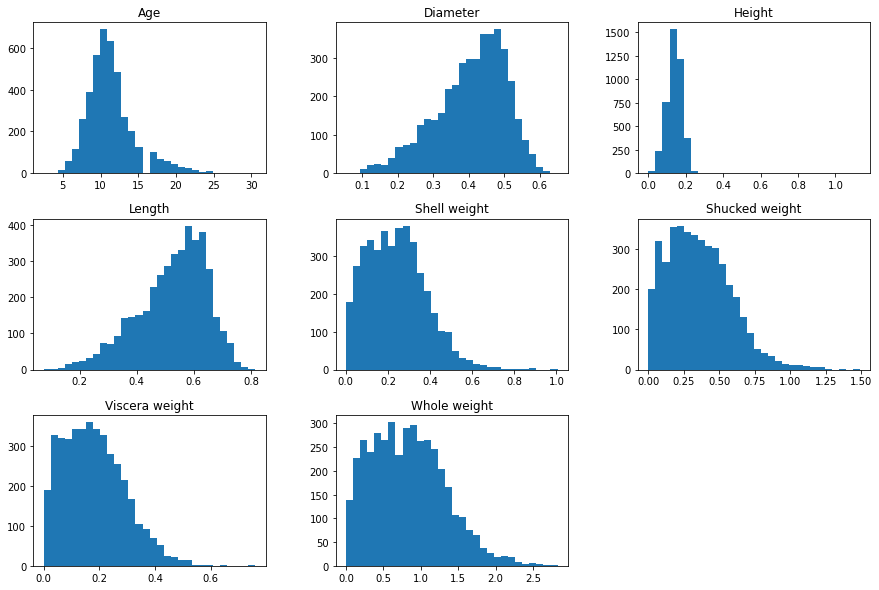

In [14]:
shell1.hist(figsize=(15,10), grid=False, layout=(3, 3), bins = 30)

In [17]:
shell1.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

'Height' and 'Age' have the skewness. The histogram plots also shows us the same.

The skewness will be dealt later.

### Correlation

In [18]:
shell1.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


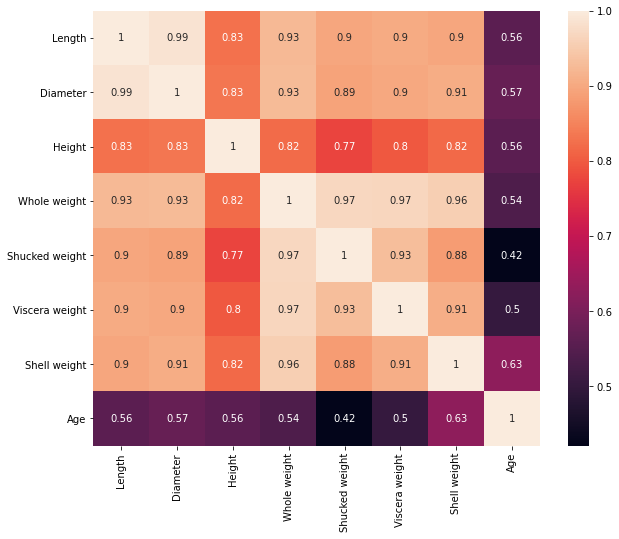

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(shell1.corr(), annot = True)

All the variables seems to be affecting 'Age' positively.

In [22]:
shell['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

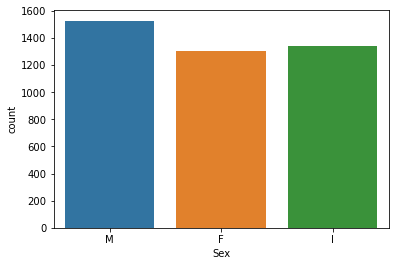

In [23]:
sns.countplot(shell['Sex'])

In [27]:
shell['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Groupby function will tell us how varied the data is, with respect to 'Sex'

In [33]:
shell1.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497


Let's check the pairplot.

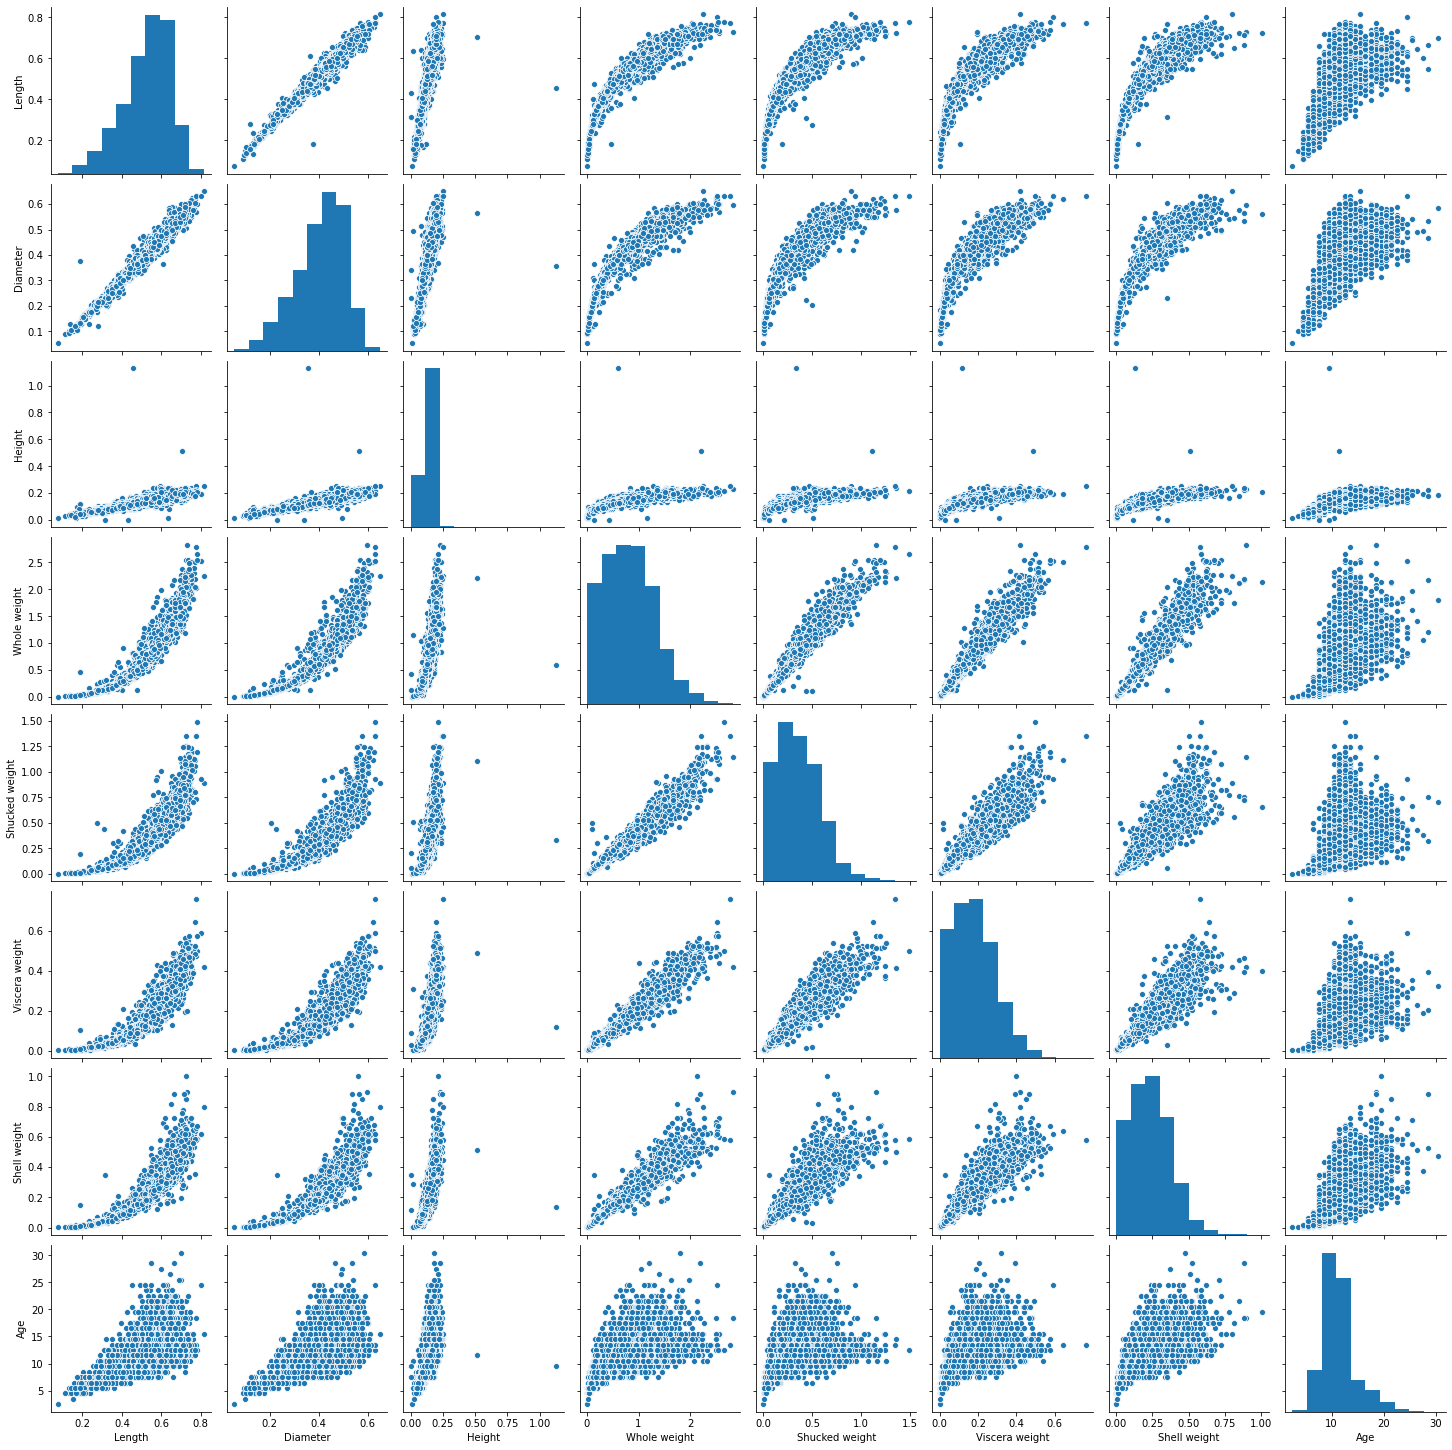

In [34]:
sns.pairplot(data = shell1)

As the heatmap suggested earlier, no negative trend is observed.

Even in the pairplot, no negative trend is observed.

In the probelm description, it was mentioned to predict the rings of each abalone which will lead us to the age of that abalone.

Thus, We'll use duplicate method to seperare the genders for predicting the age propery.

In [44]:
shell2 = pd.get_dummies(shell1)
dummy_shell = shell.copy()

In [45]:
shell2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


In [54]:
shell2['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [49]:
x = shell2.drop('Age', axis = 1)
y = shell2['Age']

In [50]:
x.shape

(4177, 10)

In [51]:
y.shape

(4177,)

In [53]:
y = y.values.reshape(-1, 1)
y.shape

(4177, 1)

In [55]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [56]:
st = StandardScaler()

x = st.fit_transform(x)

In [58]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,1.481846,-0.688018,-0.759488
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,-0.674834,-0.688018,1.316677
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.674834,-0.688018,1.316677
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,1.481846,-0.688018,-0.759488


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 60)

In [62]:
model = [LinearRegression(), Ridge(), SVR(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors = 4),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test, pred), '\n')

0.514304177450456
4.870593792684634 

0.5142269759677158
4.871367974889139 



C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5156157818784526
4.8574409260366895 



<ipython-input-62-b7d1c95b2219>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(x_train,y_train)


0.5163672000650614
4.849905648635711 

0.452792827586043
5.4874341790330305 



#### All the models seems to be performing avaragely.